# Project 4, APS1070 Fall 2021
#### **Linear Regression -  13 points**
**Deadline: Nov 26, 21:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Fengyi Xiao
*   Your **student number**: 1002956232



## Part 1 - Getting Started [1.5 marks]

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
  *   Using `train_test_split` from Sklearn, split the dataset into training, validation, and test sets ($70\%$ training, $15\%$ validation, and $15\%$ test). When splitting, set `random_state=1`.
  *   Standardize the data using `StandardScaler` from sklearn. 
  *   Insert the first column of all $1$s in the training, validation, and test set.
 
3. Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[1]**

In [ ]:
### YOUR CODE HERE ###
df

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,0.019,0.019,0.019,0.020,0.020,0.020,0.020,0.021,0.021,0.021,0.021,0.021,0.021,0.021,0.000,0.0,-0.002,0.0,0.0,0.0,-0.002,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,0.018,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,-0.002,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.018,0.018,0.017,-0.001,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.034,0.034,0.034,0.034,0.032,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[df.columns[:-1]]
y = df.Goal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size= (0.7/0.85), random_state=1)

Scaler = StandardScaler()
X_train_std = Scaler.fit_transform(X_train)
X_test_std = Scaler.transform(X_test)
X_val_std = Scaler.transform(X_val)

In [ ]:
one_col1 = np.ones((1,X_train_std.shape[0]))
X_train_std= np.insert(X_train_std,0,one_col1,axis = 1)

In [ ]:
X_train_std

array([[ 1.        ,  0.3004541 , -0.58575452, ...,  0.01177122,
         1.39835202,  1.42773998],
       [ 1.        , -1.02505276,  0.75892079, ...,  0.01177122,
         0.89251703,  0.99924434],
       [ 1.        ,  0.62608439, -0.77785099, ...,  0.01177122,
        -0.62498793, -0.85757008],
       ...,
       [ 1.        ,  1.43058277, -0.77785099, ...,  0.01177122,
        -0.11915294, -0.28624256],
       [ 1.        ,  0.58011306, -0.7010124 , ...,  0.01177122,
         1.39835202,  1.2849081 ],
       [ 1.        , -1.06336221, -2.00726841, ...,  0.01177122,
        -0.11915294, -0.28624256]])

In [ ]:
one_col2 = np.ones((1,X_val_std.shape[0]))
X_val_std= np.insert(X_val_std,0,one_col2,axis = 1)

In [ ]:
X_val_std

array([[ 1.        ,  0.84827918, -0.20156157, ...,  0.01177122,
         0.89251703,  0.71358058],
       [ 1.        ,  1.22371176, -0.23998087, ...,  0.01177122,
        -0.11915294, -0.28624256],
       [ 1.        , -0.82967458, -1.54623688, ...,  0.01177122,
         2.91585697,  2.85605876],
       ...,
       [ 1.        , -2.01726743, -0.50891593, ...,  0.01177122,
        -0.11915294, -0.28624256],
       [ 1.        , -1.18212149,  0.48998572, ...,  0.01177122,
        -0.62498793, -0.57190632],
       [ 1.        , -1.30088077, -0.20156157, ...,  0.01177122,
        -0.62498793, -0.7147382 ]])

In [ ]:
one_col3 = np.ones((1,X_test_std.shape[0]))
X_test_std= np.insert(X_test_std,0,one_col3,axis = 1)

In [ ]:
X_test_std

array([[ 1.        ,  0.68354856,  1.06627514, ...,  0.01177122,
        -0.11915294, -0.14341069],
       [ 1.        ,  0.05910458, -0.62417381, ...,  0.01177122,
        -0.62498793, -0.57190632],
       [ 1.        ,  0.10507592, -0.0094651 , ...,  0.01177122,
         1.39835202,  1.2849081 ],
       ...,
       [ 1.        , -1.27023322,  0.6820822 , ...,  0.01177122,
        -0.62498793, -0.42907444],
       [ 1.        ,  0.02845702, -0.7010124 , ...,  0.01177122,
        -0.11915294, -0.28624256],
       [ 1.        ,  0.41155149,  0.41314714, ...,  0.01177122,
        -0.62498793, -0.42907444]])

3. Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? 

**Later**

Gradient descent is an iterative algorithm.
We initialize a starting point and repeatedly adjust based on the direction of steepest descent.

Each time we update the weights is called an iteration.
Each time the model sees (learns) the whole dataset - epoch

Full batch GD:Whole dataset in one package and One epoch is one iteration.

Mini batch GD:Break dataset to k smaller batches (mini batch) and One epoch takes k iterations.

SGD:Each of the n samples is a batch and One epoch takes n iterations .

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the matrix inversion, as numpy.linalg.inv may cause numerical issues.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [ ]:
### YOUR CODE HERE ###
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import scipy


W = np.dot(scipy.linalg.inv(np.dot(X_train_std.T, X_train_std)), np.dot(X_train_std.T, y_train))
print(W)
yPred_train = np.dot(X_train_std, W)
yPred_val = np.dot(X_val_std, W)

#theta_train = direct_sol(X_train_std,y_train)
#theta_val = direct_sol(X_val_std,y_val)

def rmse(yPred, y):
    print(np.sqrt(mean_squared_error(yPred, y)))

[-8.73919368e-04  6.19785098e-05  6.06305482e-06 -1.29423842e-04
 -3.48444767e-07  8.08820959e-05 -8.33295686e-05  2.40674793e-04
 -3.50244106e-05  3.30045169e-05  1.23878468e-06  1.08204574e-04
  1.18417301e-03 -1.18308188e-03 -1.19364733e-03  9.52413446e-04
 -3.64267887e-03  3.73755013e-03  2.67109773e-03 -2.68277006e-03
  2.81835721e-04 -4.45895325e-04 -2.28719653e-04  4.13269128e-04
  1.19556652e-03 -1.16035682e-05  1.08890358e-06 -4.40515597e-06
  4.17506503e-06  8.88711666e-07  1.96972779e-05 -8.53134187e-06
 -9.56223464e-07 -8.91242387e-06 -2.79333596e-06  3.10844326e-06
  1.16456071e-07 -5.70620556e-06 -4.20244971e-06 -3.14987234e-05
 -1.38254977e-03]


In [ ]:
RMSE_train = np.sqrt(mean_squared_error(yPred_train, y_train))
print(RMSE_train)

0.00017582566439460675


In [ ]:
RMSE_val = np.sqrt(mean_squared_error(yPred_val, y_val))
print(RMSE_val)

0.00017098053894782936


## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you have calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[0.5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

X:  (9624, 41)
w:  (1, 41)
y:  (9624, 1)


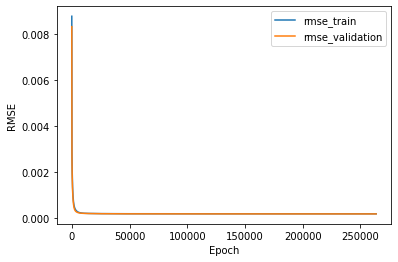

--- Total Training Time: 283.47765827178955 (s) ---


In [ ]:
import time
start_time = time.time() ## Records current time

## GD Script -- Sample code in tutorial! ##

#X_GD = np.concatenate((X_train_std,X_val_std, X_test_std))
#y_GD = np.concatenate((y_train,y_val, y_test)).reshape(1,-1).T

X_GD =X_train_std
y_GD = y_train.to_numpy().reshape((-1,1))

w = (np.random.uniform(0,0.001,X_GD.shape[1])).reshape(1,-1) ### Inital weights
lr = .001
ct = 1.001 * RMSE_val
rmse_train=[]
rmse_validation = []


for epoch in range (0, 300000): 
  y_pre= np.dot(X_GD,w.T).reshape (-1,1)
  y_val_pre = np.dot(X_val_std,w.T).reshape (-1,1)
  rmse_train.append(np.sqrt(mean_squared_error(y_pre, y_GD)))
  rmse_validation.append(np.sqrt(mean_squared_error(y_val_pre, y_val.to_numpy().reshape((-1,1)))))
  #print(rmse_validation[-1])
  gradient = (1/len(y_pre) * np.dot(X_GD.T, y_pre-y_GD)).reshape(1,-1)
  w = w - lr * gradient ### weight update
  if rmse_validation[-1] <= ct:
    break


print ("X: ", X_GD.shape)
print ("w: ", w.shape)
print ("y: ", y_GD.shape)
#print ("t: ", t.shape)
plt.plot(rmse_train,label = "rmse_train")
plt.plot(rmse_validation, label = "rmse_validation")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()


print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

In [ ]:
print(rmse_validation[-1])
len(rmse_validation)

0.0001711515152924467


263676

From the "Epoch vs RMSE" graph, we see that when the epoch number increase, the RMSE decrease. Especially after 1000 epoch, the RMSE sharpely decrease and become lower than 0.002 and close to 0. Since the Training and Validation results are very close to each other, we can say there are neither overfitting nor underfitting.


## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [ ]:
### YOUR CODE HERE ###
X_GD =X_train_std
y_GD = y_train.to_numpy().reshape((-1,1))

def create_mini_batches(X, y, batch_size):
    mini_batches = []
    train_data = np.hstack((X, y))
    np.random.permutation(train_data)
    n_minibatch = train_data.shape[0] // batch_size
    i = 0
  
    for i in range(n_minibatch + 1):
        mini_batch = train_data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    
    return mini_batches


In [ ]:
#create_mini_batches(X_GD,y_GD,128)

In [35]:
import time
start_time = time.time() ## Records current time

X_GD =X_train_std
y_GD = y_train.to_numpy().reshape((-1,1))


def mini_batch(X,y,batch_size,lr,ct):
  orig_run_time = 0
  total_start_time = time.time()
  w = (np.random.uniform(0,0.001,X.shape[1])).reshape(1,-1) ### Inital weights
  rmse_train=[]
  rmse_validation = []
  #rmse_val_mini = []
  elapsed_time = []

  for epoch in range (0, 2000):
    start_time = time.time()
    mini_batches = create_mini_batches(X, y, batch_size)
    #print(mini_batches)
    for mini_batch in mini_batches:
      X_mini, y_mini = mini_batch
      
      y_pre= np.dot(X_mini,w.T).reshape (-1,1)
      gradient = (1/len(y_pre) * np.dot(X_mini.T, y_pre-y_mini)).reshape(1,-1)
      w = w - lr * gradient ### weight update
           


    y_final_pre= np.dot(X_GD,w.T).reshape (-1,1)
    rmse_train.append(np.sqrt(mean_squared_error(y_final_pre, y_GD)))
    y_val_pre = np.dot(X_val_std,w.T).reshape (-1,1)
    rmse_vali = np.sqrt(mean_squared_error(y_val_pre, y_val.to_numpy().reshape((-1,1))))
    rmse_validation.append(rmse_vali)
    
    

    if len(rmse_validation) > 4 and  rmse_vali > rmse_validation[-2]:
      run_time = time.time() - start_time
      elapsed_time.append(run_time)
      break
    
    if rmse_validation[-1] <= ct:
      run_time = time.time() - start_time
      elapsed_time.append(run_time)
      break
    
    run_time = time.time() - start_time
    orig_run_time = orig_run_time + run_time
    elapsed_time.append(orig_run_time)
    
  
  total_run_time = time.time() - total_start_time
  return w, rmse_train, rmse_validation,elapsed_time,total_run_time

In [37]:
X_GD =X_train_std
y_GD = y_train.to_numpy().reshape((-1,1))


w_128, rmse_train_128, rmse_validation_128,elapsed_time_128,total_run_time128 = mini_batch(X_GD,y_GD,batch_size = 128,lr = 0.01,ct = 1.001 * RMSE_val)
w_256, rmse_train_256, rmse_validation_256,elapsed_time_256,total_run_time256 = mini_batch(X_GD,y_GD,batch_size = 256,lr = 0.01,ct = 1.001 * RMSE_val)
w_512, rmse_train_512, rmse_validation_512,elapsed_time_512,total_run_time512 = mini_batch(X_GD,y_GD,batch_size = 512,lr = 0.01,ct = 1.001 * RMSE_val)
w_64, rmse_train_64, rmse_validation_64,elapsed_time_64,total_run_time64 = mini_batch(X_GD,y_GD,batch_size = 64,lr = 0.01,ct = 1.001 * RMSE_val)
w_32, rmse_train_32, rmse_validation_32,elapsed_time_32,total_run_time32 = mini_batch(X_GD,y_GD,batch_size = 32,lr = 0.01,ct = 1.001 * RMSE_val)

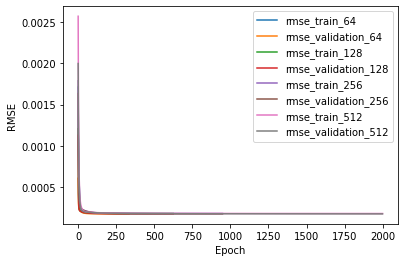

In [32]:

#plt.plot(rmse_train_32,label = "rmse_train_32")
#plt.plot(rmse_validation_32, label = "rmse_validation_32")
plt.plot(rmse_train_64,label = "rmse_train_64")
plt.plot(rmse_validation_64, label = "rmse_validation_64")
plt.plot(rmse_train_128,label = "rmse_train_128")
plt.plot(rmse_validation_128, label = "rmse_validation_128")
plt.plot(rmse_train_256,label = "rmse_train_256")
plt.plot(rmse_validation_256, label = "rmse_validation_256")
plt.plot(rmse_train_512,label = "rmse_train_512")
plt.plot(rmse_validation_512, label = "rmse_validation_512")

plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

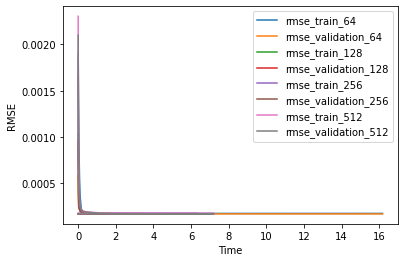

In [38]:
#plt.plot(elapsed_time_32,rmse_train_32,label = "rmse_train_32")
#plt.plot(elapsed_time_32,rmse_validation_32, label = "rmse_validation_32")
plt.plot(elapsed_time_64,rmse_train_64,label = "rmse_train_64")
plt.plot(elapsed_time_64,rmse_validation_64, label = "rmse_validation_64")
plt.plot(elapsed_time_128,rmse_train_128,label = "rmse_train_128")
plt.plot(elapsed_time_128,rmse_validation_128, label = "rmse_validation_128")
plt.plot(elapsed_time_256,rmse_train_256,label = "rmse_train_256")
plt.plot(elapsed_time_256,rmse_validation_256, label = "rmse_validation_256")
plt.plot(elapsed_time_512,rmse_train_512,label = "rmse_train_512")
plt.plot(elapsed_time_512,rmse_validation_512, label = "rmse_validation_512")

plt.xlabel("Time")
plt.ylabel("RMSE")
plt.legend()
plt.show()

Text(0.5, 0, 'Batch')

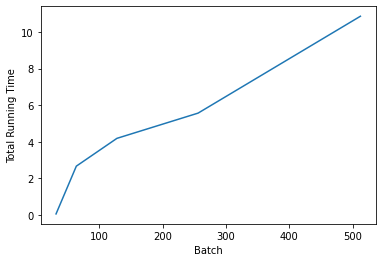

In [34]:
batch_size_lst = [32,64,128,256,512]
total_time_lst = [total_run_time32,total_run_time64,total_run_time128,total_run_time256,total_run_time512]

plt.plot(batch_size_lst,total_time_lst)
plt.ylabel("Total Running Time")
plt.xlabel("Batch")

**Describe Findings**

From the first plot"RMSE vs Epoch" We notice that the more epoch we run, the less RMSE we get. After approximately 100 epoch, the RMSE is less than 0.0001. Comparing the validation set result and the training set result, the RMSE graph of both are close enough, so we can say that there is neither overfiting nor overfitting.

From the second plot "RMSE vs TIME" we can see that the shape is similar to the "RMSE vs Epoch" plot. Ater 0.1, the RMSE sharply decrease to near 0. When the epoch running time increase, the RMSE decrease.

From the third plot 'Total Training time vs Batch size" We notice that when the batch size increase, the Total training time increase and it's nearly linear relationship between these two factors.



## Part 5 - Introducing Momentum [3.5 marks]

Momentum is a popular technique that helps the gradient descent algorithm to converge faster. Simply, it behaves like a moving average of gradients. First, take a look at [here](https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d) to get familiar with the concept.

To summarize, If the weight update formula in the time-step $t$ is $w_t = w_{t-1} - \alpha~g_t$, the $g_t$ using momentum could be computed as $g_t = \beta~g_{t-1} + (1-\beta) \frac{{\partial J}}{\partial w}$. Where $\beta$ is the momentum coefficient, between [0, 1]. 

Weight updates ($g_t$) with momentum are not only computed based on the derivative of the loss function but also is a function of previous weight updates.

If you put $\beta=0$ in the $g_t$ equation, it would be the original gradient descent method. 

* Add momentum to your training function. **[1]**
* Train a linear model with a specific batch size and various values of momentums. 
  *  Plot your training and validation RMSE for each epoch. **[1]**
  *  With some plots (or tables) show how momentum affects the training time.  **[1]**
  * Summarize your experiments and comment on the effect of momentum. **[0.5]**

In [50]:
import time
start_time = time.time() ## Records current time

X_GD =X_train_std
y_GD = y_train.to_numpy().reshape((-1,1))


def mini_batch_mot(X,y,batch_size,lr,ct,beta):
  orig_run_time = 0
  total_start_time = time.time()
  w = (np.random.uniform(0,0.001,X.shape[1])).reshape(1,-1) ### Inital weights
  rmse_train=[]
  rmse_validation = []
  #rmse_val_mini = []
  elapsed_time = []

  for epoch in range (0, 2000):
    start_time = time.time()
    mini_batches = create_mini_batches(X, y, batch_size)
    #print(mini_batches)
    gradient_old = 0


    for mini_batch in mini_batches:
      X_mini, y_mini = mini_batch
      

      y_pre= np.dot(X_mini,w.T).reshape (-1,1)
      theta = (1/len(y_pre) * np.dot(X_mini.T, y_pre-y_mini)).reshape(1,-1)
      gradient = beta * gradient_old + (1-beta) * theta
      gradient_old = gradient
      w = w - lr * gradient ### weight update     


    y_final_pre= np.dot(X_GD,w.T).reshape (-1,1)
    rmse_train.append(np.sqrt(mean_squared_error(y_final_pre, y_GD)))
    y_val_pre = np.dot(X_val_std,w.T).reshape (-1,1)
    rmse_vali = np.sqrt(mean_squared_error(y_val_pre, y_val.to_numpy().reshape((-1,1))))
    rmse_validation.append(rmse_vali)
    
    

    if len(rmse_validation) > 4 and  rmse_vali > rmse_validation[-2]:
      run_time = time.time() - start_time
      elapsed_time.append(run_time)
      break
    
    if rmse_validation[-1] <= ct:
      run_time = time.time() - start_time
      elapsed_time.append(run_time)
      break
    
    run_time = time.time() - start_time
    orig_run_time = orig_run_time + run_time
    elapsed_time.append(orig_run_time)
    
  
  total_run_time = time.time() - total_start_time
  return w, rmse_train, rmse_validation,elapsed_time,total_run_time

In [51]:
w_0, rmse_train_0, rmse_validation_0,elapsed_time_0,total_run_time0 = mini_batch_mot(X_GD,y_GD,batch_size = 256,lr = 0.01,ct = 1.001 * RMSE_val,beta = 0)
w_3, rmse_train_3, rmse_validation_3,elapsed_time_3,total_run_time3 = mini_batch_mot(X_GD,y_GD,batch_size = 256,lr = 0.01,ct = 1.001 * RMSE_val,beta = 0.3)
w_6, rmse_train_6, rmse_validation_6,elapsed_time_6,total_run_time6 = mini_batch_mot(X_GD,y_GD,batch_size = 256,lr = 0.01,ct = 1.001 * RMSE_val,beta = 0.6)
w_9, rmse_train_9, rmse_validation_9,elapsed_time_9,total_run_time9 = mini_batch_mot(X_GD,y_GD,batch_size = 256,lr = 0.01,ct = 1.001 * RMSE_val,beta = 0.9)

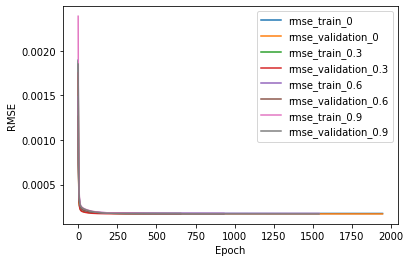

In [52]:
plt.plot(rmse_train_0,label = "rmse_train_0")
plt.plot(rmse_validation_0, label = "rmse_validation_0")
plt.plot(rmse_train_3,label = "rmse_train_0.3")
plt.plot(rmse_validation_3, label = "rmse_validation_0.3")
plt.plot(rmse_train_6,label = "rmse_train_0.6")
plt.plot(rmse_validation_6, label = "rmse_validation_0.6")
plt.plot(rmse_train_9,label = "rmse_train_0.9")
plt.plot(rmse_validation_9, label = "rmse_validation_0.9")

plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

Text(0.5, 0, 'Momentum Value')

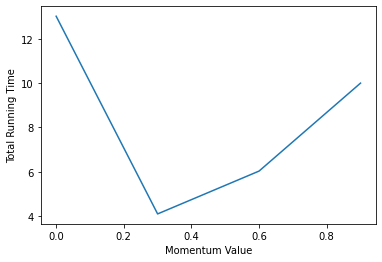

In [53]:
momentum_lst = [0,0.3,0.6,0.9]
time_lst = [total_run_time0,total_run_time3,total_run_time6,total_run_time9]

plt.plot(momentum_lst,time_lst)
plt.ylabel("Total Running Time")
plt.xlabel("Momentum Value")

**Summary**

From the first plot we can see that the "RMSE vs Epoch" graph is similar to the previous training model, so not much difference that the momentum has on the RMSE element. The RMSE after 100 is close to zero and there are not overfitting or underfitting in this model.

However, we notice that when beta is 0, it's the same as original GD method. But we can find an optimal beta so that minimize the running time for a specific batch size. Here is around 0.3, the running time is minimum and later it starts to incrase. And the running time using this beta is much less than the original GD method's running time.

## Part 6 - Finalizing a model [1 marks]
Based on your findings from the previous parts, pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the test set. 

Briefly describe your model selections/settings. **[0.5]** 

Summarize the performance of your model for the task of managing ailerons of an aircraft. **[0.5]** 

In [ ]:
#I would choose using the mini_batch training method with the momentum, using beta = 0.3 and batch size = 128. 
#choose the Learning Rate = 0.01,the max epoch number of 2000.

In [60]:
import time
start_time = time.time() ## Records current time

X_GD =X_train_std
y_GD = y_train.to_numpy().reshape((-1,1))


def mini_batch_final(X,y,batch_size = 128 ,lr = 0.01,beta = 0.3):
  orig_run_time = 0
  total_start_time = time.time()
  w = (np.random.uniform(0,0.001,X.shape[1])).reshape(1,-1) ### Inital weights
  elapsed_time = []

  for epoch in range (0, 2000):
    start_time = time.time()
    mini_batches = create_mini_batches(X, y, batch_size)
    #print(mini_batches)
    gradient_old = 0


    for mini_batch in mini_batches:
      X_mini, y_mini = mini_batch
      

      y_pre= np.dot(X_mini,w.T).reshape (-1,1)
      theta = (1/len(y_pre) * np.dot(X_mini.T, y_pre-y_mini)).reshape(1,-1)
      gradient = beta * gradient_old + (1-beta) * theta
      gradient_old = gradient
      w = w - lr * gradient ### weight update     


    y_final_pre= np.dot(X_GD,w.T).reshape (-1,1)
    rmse_train = np.sqrt(mean_squared_error(y_final_pre, y_GD))
    y_test_pre = np.dot(X_test_std,w.T).reshape (-1,1)
    rmse_test = np.sqrt(mean_squared_error(y_test_pre, y_test.to_numpy().reshape((-1,1))))
    
    
    run_time = time.time() - start_time
    orig_run_time = orig_run_time + run_time
    elapsed_time.append(orig_run_time)
    
  
  total_run_time = time.time() - total_start_time
  print("The RMSE on the test set : " , rmse_test)
  print("The total running time is ", total_run_time)
  return rmse_test,total_run_time

In [61]:
mini_batch_final(X_GD,y_GD,batch_size = 128 ,lr = 0.01,beta = 0.3)

The RMSE on the test set :  0.00017017614376036436
The total running time is  15.695916414260864


(0.00017017614376036436, 15.695916414260864)

By using this model, the RMSE on the test set is 0.00017017614376036436 which is very small. This means our prediction model fits well on our data set. Also the running time is around 15s, which is also very efficient.